
<p align="center">
  <img src="https://security.ufpb.br/educacaofinanceira/contents/imagens/brasoes-universidades/ufpa.png/@@images/image.png" alt="UFPA logo" width=100/>
</p>

<p align="center">
  <strong>Universidade Federal do Pará (UFPA) - Tucuruí, PA - Brasil</strong><br>
  <strong>Faculdade de Engenharia de Computação</strong>
</p>

---

# Trabalho Final da Disciplina de **Processamento Digital de Sinais**

---

Assunto: **Projeto e Implementação de Filtro Digital**

> Docente: **Cleison Daniel Silva**<br>
> Discente: **Lucas Vitor Loch Pereira**<br>
> Matrícula: **201833840013**<br>
> Data: **29/06/2022**



## **Especificações do Projeto**

---

Para um dado problema de PDS, projetar um Filtro Digital e simular e implementar o filtro, interpretando os sinais de entrada e de saída, nos domínios do tempo discreto e da frequência. O projeto e a implementação do filtro deve contemplar as seguintes etapas.

1. Definir o sinal em tempo contínuo;
2. Análise do sinal contínuo no domínio da frequência;
3. Definir o filtro anti-aliasing e a frequência de amostragem apropriada;
4. Amostrar e reconstruir o sinal contínuo;
5. Análise do sinal discreto no domínio da frequência;
6. Definir a banda de frequência de interesse de acordo com a aplicação selecionada;
7. Definir as especificações do Filtro Digital e Projetar o Filtro;
8. Análise do sinal de saída do filtro digital;
9. Comentar e justificar todas as etapas;
10. Simulação e implementação completa

## Tranformação do Áudio em .wav

---

Visto que o arquivo de áudio está no formato .m4a teremos de converte-lo para .wav

In [3]:
arqEntrada = '/content/audio2.m4a'

In [4]:
!pip install pydub

from os import path
from pydub import AudioSegment

def descobreTipoAudio (arq):
  tipo = arq.split('.')
  return tipo.pop(), "".join(tipo)

tipoAudio, nome = descobreTipoAudio(arqEntrada)
arqWav = nome+"WAV.wav"

sound = AudioSegment.from_file(arqEntrada, tipoAudio)
sound.export(arqWav, format="wav")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<_io.BufferedRandom name='/content/audio2WAV.wav'>

## Importações

---

In [5]:
import numpy as np
import IPython
from scipy.io import wavfile
from scipy import signal
from scipy import fftpack
import matplotlib.pyplot as plt

## Sobre

---

Todos os sinais que você escuta podem ser considerados sinais analógicos, isso quer dizer que são sinais de tempo contínuo, ou em outras palavras, existem para todo instante de tempo dentro daquele intervalo em que ocorre. Contudo, para podermos fazer a análise do sistema no domínio discreto é necessário que façamos um processo chamado amostragem, onde esse sinal é transformado numa sequência finita de pontos discretos.

![trnsformação do sinal](http://consulteengenheiroeletronico.files.wordpress.com/2014/02/continuo_discreto1.jpg)

Através da imagem é possível observar que esse processo de amostragem não é perfeito, afinal não há como imitar perfeitamente um sinal que possui infinitos valores, portanto trata-se nada mais de uma aproximação grosseira.

Neste trabalho o sinal a ser usado trata-se de um sinal real, portanto não é possível fazermos sua definição no domínio do tempo tão perfeitamente, da mesma forma, não é possível analisá-lo no domínio da frequência antes de ser feito processo de amostragem.

Por conta disso, quando analisamos um sinal real no tempo discreto, primeiro passamos ele por um filtro anti-aliasing.

## Filtro anti-aliasing

---

Filtros anti-aliasing são sempre filtros analógicos à medida que processam o sinal antes de ser amostrado e antes dos conversores analógicos digitais (ADC). Na maioria dos casos, eles são filtros passa-baixas.

O propósito de um filtro anti-aliasing consiste basicamente em tentarmos tornar os sinais que encontamos em circuitos físicos, que não são limitados, mas estamos determinados a experimentá-los de qualquer maneira, em sinais limitados por bandas. 

Ao passar o sinal através de um filtro passa-baixas antes da amostragem, podemos atenuar o conteúdo espectral acima de uma frequência especificada e, assim, criar um sinal com um limite frequência superior.

![filtro anti-aliasing](https://www.allaboutcircuits.com/uploads/articles/sampling-theory-for-circuit-designers-understanding-anti-aliasing-filters-rk-aac-image2.jpg)

O arquivo de áudio utilizado foi gravado fazendo uso de um notebook Aspire 5 A515-52G-57NL. Por não se tratar de um sinal sintético criado pelo computador, mas sim de um sinal real, o filtro anti-aliasing é implementado diretamente, sem interferência do usuário.

## Demonstração do sinal

---

**Canais de Áudio:** Um arquivo de áudio estéreo consiste de 2 canais: esquerdo e direito. Cada amostra do canal é armazenado como um número com assinatura de 16 bits, assim sendo, cada amostra do sinal pode variar entre -32.768 e +32.767.

**Taxa de Amostragem:** Os sinais de áudio são analógicos, mas queremos representá-los digitalmente, ou seja, queremos discretizá-los em valor e em tempo, a taxa de amostragem dá quantas vezes por segundo obtemos um valor. A unidade é Hz. O alcance da audição humana vai de ~20Hz a ~20kHz, então você pode cortar qualquer coisa acima de 20kHz. O que significa que uma taxa de amostragem de mais de 40kHz não faz muito sentido.

**Profundidade de Bits:** Quanto maior a profundidade de bits, mais faixa dinâmica pode ser capturada. A faixa dinâmica é a diferença entre o volume mais baixo e o mais alto de um instrumento, parte ou peça musical. Um valor típico parece ser 16 bits ou 24 bits. Uma profundidade de bits de 16 bits tem uma faixa dinâmica teórica de 96 dB, enquanto 24 bits tem uma faixa dinâmica de 144 dB.

In [6]:
IPython.display.Audio(arqWav)

A função `wavfile.read()` gera automaticamente um número inteiro que representa a taxa de amostragem (em amostras/segundo) e um *numpy array* que contém as informações do áudio. Outras informações podem ser retiradas a partir daí.

In [7]:
fs, wav_file = wavfile.read(arqWav)

print(f'Taxa de amostragem: {fs} Hz')
print(f'Número de amostras: {len(wav_file)}')
n_canais = wav_file.shape[1]
print(f'Número de canais: {n_canais}')
duracao = wav_file.shape[0] / fs
print(f'Duração: {duracao} seg')
print(f'Tipo de dado: {wav_file.dtype}')
print(f'Menor amplitude: {wav_file.min()}')
print(f'Maior amplitude: {wav_file.max()}')

Taxa de amostragem: 48000 Hz
Número de amostras: 210944
Número de canais: 2
Duração: 4.394666666666667 seg
Tipo de dado: int16
Menor amplitude: -17484
Maior amplitude: 19137


Como trata-se de um som estéreo, com dois canais, verificaremos se há diferença entre ambos canais.

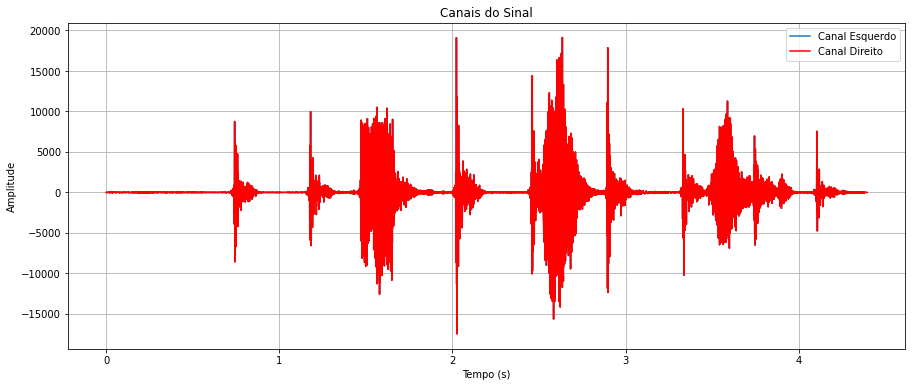

In [8]:
tempo = np.linspace(0., duracao, wav_file.shape[0])
plt.figure(figsize=(15, 6))
plt.title("Canais do Sinal")
plt.plot(tempo, wav_file[:, 0], label="Canal Esquerdo")
plt.plot(tempo, wav_file[:, 1], label="Canal Direito", color='r')
plt.legend()
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

Como pode-se observar, ambos os canais de áudio possuem formato similar, sendo assim será usado apenas um canal na filtragem.

In [9]:
sinal = wav_file[:, 0]

Agora que o sinal a ser utilizado já fora coletado e possuímos as informações necessárias, usaremos a transformada discreta de Fourier para poder gerar o sinal no domínio da frequência, onde será aplicado o filtro para redução de ruído.

A Transformada Discreta de Fourier se dá pela fórmula:
\begin{align}
        X[k] = \frac1N\sum_{n=0}^{N-1} x[n]e^{\frac{-j\pi kn}{N}}
    \end{align}
  
Como trata-se de um sinal real será feito o uso de bibliotecas para obter um melhor resultado na transformada.

In [10]:
sinal_freq = fftpack.fft(sinal)

# Os valores gerados são complexos, mas queremos apenas os absolutos, então
magnitude = np.abs(sinal_freq)

Agora que obtemos o sinal tanto no tempo quanto na frequência, podemos exibi-los para termos de comparação.

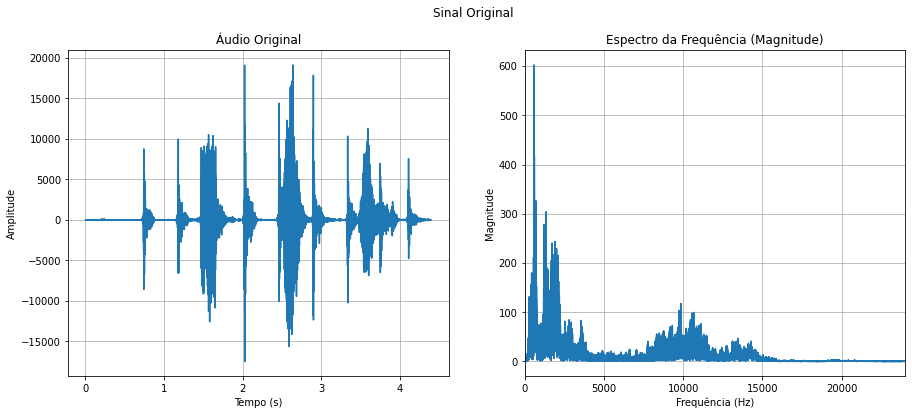

In [11]:
fig = plt.figure(figsize = (15, 6))
fig.suptitle('Sinal Original')
ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Áudio Original")
ax1.set_xlabel("Tempo (s)")
ax1.set_ylabel("Amplitude")
ax1.grid()
ax1.plot(tempo, sinal)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Espectro da Frequência (Magnitude)")
ax2.set_xlabel("Frequência (Hz)")
ax2.set_ylabel("Magnitude")
ax2.set_xlim(0, 24000)
ax2.grid()
ax2.plot(magnitude / fs)
plt.show()

Pode-se observar também, através do código

```
np.where(magnitude == np.max(magnitude))[0][0]
```

que a frequência máxima é 602 Hz.

## Filtragem

---

O tipo de filtro escolhido para aplicação foi o filtro Butterworth, um tipo de projeto de filtros eletrônicos. Ele é desenvolvido de modo a ter uma resposta em frequência o mais plana o quanto for matematicamente possível na banda passante.

O filtro escolhido para ser projetado foi um filtro passa-altas. Este filtro passa todas as frequências acima de sua frequência de corte e bloqueia todas as frequências abaixo da frequência de corte. A curva de frequência típica de um filtro passa-altas é mostrada abaixo.:

![filtro passa-altas](https://www.analogictips.com/wp-content/uploads/2021/02/Image-Showing-Frequency-Response-High-Pass-Audio-Filter.png)

Como pode ser visto no gráfico de resposta de frequência, os sinais de baixa frequência não são completamente atenuados na frequência de corte. Frequências abaixo das frequências de corte também são passadas por este filtro passa-altas, mas com muito menos ganho.

Para podermos fazer uma melhor análise do sinal, vamos mostrar o gráfico novamente, mas apenas com a frequência em destaque.

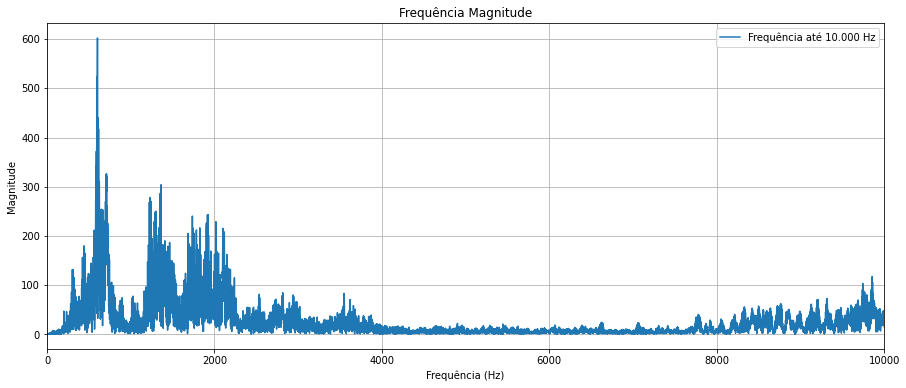

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(magnitude / fs, label="Frequência até 10.000 Hz")
plt.title("Frequência Magnitude")
plt.legend()
plt.xlabel("Frequência (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 10000)
plt.grid()
plt.show()

A partir do gráfico é possível observar que os sinais de maior intensidade se encontram entre 0 e 1 kHz, sendo assim, usaremos um filtro para atenuar os sinais que estão nesse intervalo, utilizando 1 kHz como frequência de corte. Contudo, ainda é necessário escolher a ordem do filtro a ser projetado, por isso devemos especificar o tipo de filtro que queremos.

---

### Especificações do Filtro Digital Passa-Altas

---

Para podermos obter a mínima ordem possível do filtro usaremos a função `signal.buttord()`, mas antes disso, é necessário especificarmos o tipo de filtro desejado.

Para este filtro optaremos por ter uma atenuação de 50 dB até a frequência de 4000 Hz, e a partir disso o sinal lentamente voltará ao normal até a frequência de 8000 Hz, onde passará a permitir toda a banda com uma ondulação de 1 dB.

Sendo assim, teremos:

*   Taxa de amostragem:
> fs = 48000 Hz

*   Frequência de corte na banda de passagem:
> $f_{pass}$ = 2000 Hz<br>
> wp = $\frac{f_{pass}}{fs/2}$<br>
> wp = 0.08333333333333333 rad

*   Frequência de corte na banda de parada:
> $f_{stop}$ = 1000 Hz<br>
> ws = $\frac{f_{stop}}{fs/2}$<br>
> ws = 0.041666666666666664 rad

*   Ondulação na banda de passagem:
> ap = 0.1 dB

*   Atenuação na banda de parada:
> as = 50 dB

Com isso, agora podemos aplicar os valores obtidos à função `signal.buttord()` para obtermos a ordem a ser utilizada.

In [13]:
f_pass = 2000
f_stop = 1000

wp = f_pass/(fs/2)  # passando para radianos
ws = f_stop/(fs/2)  # passando para radianos

s_ap = 0.1
s_as = 50

# Ondulação na banda de passagem (usada apenas no gráfico)
obp = 0.5

Td = 1

# Conversão para frequência analógica
omega_p = (2/Td)*np.tan(wp/2)
omega_s = (2/Td)*np.tan(ws/2)

# Design do filtro com o uso da função buttord
N, Wn = signal.buttord(omega_p, omega_s, s_ap, s_as)
print("Ordem do filtro:", N)
# Wn é a frequência de corte fornecida, mas será usada outra frequência no filtro

Ordem do filtro: 11


Com isso, vemos que a ordem mínima necessária para a criação do filtro que queremos é 11.

Mas ainda podemos tirar a prova visualizando a resposta da magnitude ao aplicarmos essa ordem.

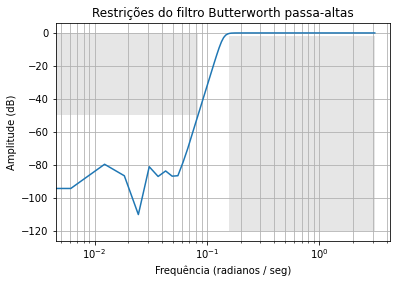

In [14]:
# Conversão para o domínio z (apenas para plotagem do gráfico)
b, a = signal.butter(np.abs(N), Wn, 'high', True)
z, p = signal.bilinear(b, a, obp)
w, h = signal.freqz(z, p, 512)

# Resposta de Magnitude
plt.semilogx(w, 20*np.log10(abs(h)))
plt.title('Restrições do filtro Butterworth passa-altas')
plt.xlabel('Frequência (radianos / seg)')
plt.ylabel('Amplitude (dB)')
plt.grid(which='both', axis='both')
plt.fill([0, omega_p, omega_p, 0], [0, 0, -50, -50], '0.9', lw=0) # stop
plt.fill([10**-0.8, 10**-0.8, 10**0.5, 10**0.5], [-120, -2, -2, -120], '0.9', lw=0) # pass
plt.show()

Podemos ver pelo gráfico como funcionará o nosso filtro, atenuando as baixas frequências e passando as altas.

**OBS**: as "caixas" foram adicionada manualmente, para um melhor entendimento, portanto não devem ser tratadas como representações reais.

---

### Processo de Filtragem

---

Agora que obtemos a ordem do filtro, podemos dar início ao processo de filtragem

A função criada `filtro_passa_altas()` é uma função que busca resumir as etapas para fazer a filtragem do sinal. Essa função recebe como parâmetros o sinal, a frequência de corte desejada (em Hz), a taxa de amostragem e a ordem do filtro.

A primeira coisa a ser calculada é a frequência de Nyquist (`nyq`), que é a metade da taxa de amostragem, e com base nisso é feita a normalização do corte, dividindo o a frequência de corte passada pela frequência de Nyquist obtida.

A função `signal.butter()` é a responsável pelo design do filtro digital e analógico *butterworth*, premitindo projetar um filtro *butterworth* digital ou analógico de ordem *n*. Os valores que essa função retornam são o numerador (b) e denominador (a) polinômias do filtro IIR, utilizados em seguida.
>  b, a: ndarray, ndarray<br>
>  Numerador (b) e denominador (a) polinômias do filtro IIR.

A função `signal.filtfilt()` é a responsável pelo filtro em si, visto que esta função aplica um filtro digital linear duas vezes, um para a frente e um para trás. O filtro combinado tem fase zero e uma ordem de filtro duas vezes maior que a original. Essa função nos retorna a saída filtrada com a mesma forma que o sinal passado.


Já a função `signal.freqz()` nos permite calcular a resposta de frequência de um filtro digital. Dado o numerador de ordem M *b* e o denominador de ordem N *a* de um filtro digital, a sua resposta em frequência é calculada:

\begin{align}
        H[e^{jw}] = \frac{B[e^{jw}]}{A[e^{jw}]} = \frac{b[0] + b[1]e^{-jw} + ... + b[M]e^{-jwM}}{a[0] + a[1]e^{-jw} + ... + a[M]e^{-jwM}}
    \end{align}

> w (ndarray): As frequências em que h foi computado, nas mesmas unidades que fs. Por padrão, w é normalizado para a faixa [0, pi) (radianos/amostra).

> h (ndarray): A resposta de frequência, como números complexos.

Ao final também feito a plotagem do gráfico da resposta em frequência, criado com base nos dados da função `signal.freqz()`.

In [15]:
# Código inspirado no vídeo de PANKAJRAWAT (está nas referências)
def filtro_passa_altas(dados, corte, fs, ordem):
  nyq = 0.5 * fs # Frequência de Nyquist
  corte_normal = corte / nyq # Corte normalizado, pois deve ser um valor maior que 0 e menor que 1
  print("Corte real:", corte_normal, (dados.shape[0] / 2) * corte_normal)
  b, a = signal.butter(ordem, corte_normal, btype='high', analog=False)
  y = signal.filtfilt(b, a, dados)
  
  def _plot_graph():
    w, h = signal.freqz(b, a, worN=8000)
    plt.figure(figsize=(15,8))
    plt.subplot(2, 1, 1)
    plt.plot(0.5 *fs*w/np.pi, np.abs(h), 'b')
    plt.plot(corte, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(corte, color='k')
    plt.xlim(0, 5000)
    plt.title("Resposta em Frequência do Filtro")
    plt.xlabel('Frequência [Hz]')
    plt.grid()
    plt.show()
  
  _plot_graph()
  return y

Corte real: 0.041666666666666664 4394.666666666666


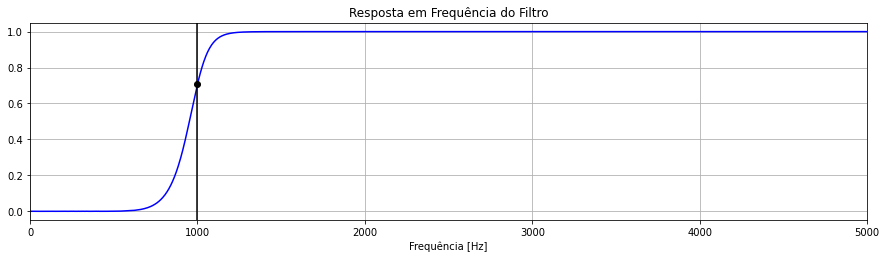

In [16]:
# Características do filtro
ordem = N
corte = 1000 # 1300 # Frequência de corte desejada, em Hz

# Printa a resposta em frequência
y = filtro_passa_altas(sinal, corte, fs, ordem)

Após a execução é possível verificar os sinais antes e depois do filtro.

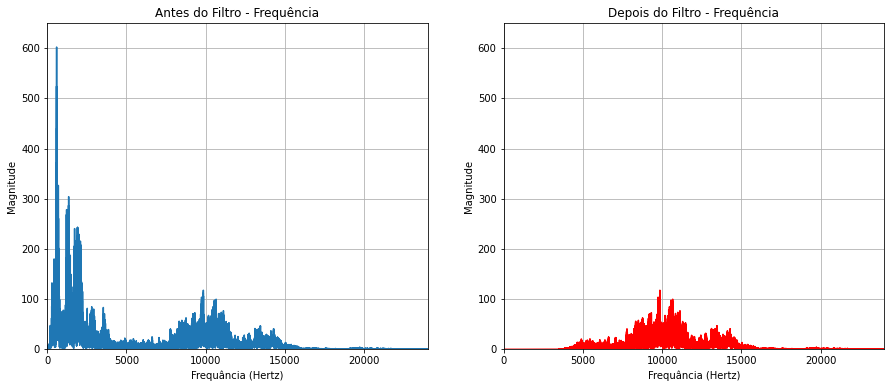

In [17]:
fig = plt.figure(figsize = (15, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Antes do Filtro - Frequência")
ax1.set_xlabel("Frequância (Hertz)")
ax1.set_ylabel("Magnitude")
ax1.set_xlim(0, 24000)
ax1.set_ylim(0, 650)
ax1.grid()
ax1.plot(magnitude / fs)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Depois do Filtro - Frequência")
ax2.set_xlabel("Frequância (Hertz)")
ax2.set_ylabel("Magnitude")
ax2.set_xlim(0, 24000)
ax2.set_ylim(0, 650)
ax2.grid()
ax2.plot(np.abs(fftpack.fft(y)) / fs, 'r')

plt.show()

O gráfico acima mostra os sinais no domínio da frequência, sendo possível observar que houve a atenuação nos sinais antes de 1000 Hz.

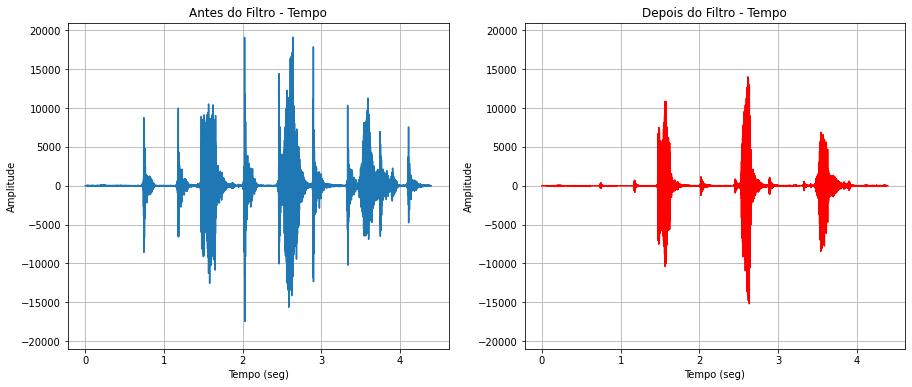

In [18]:
fig = plt.figure(figsize = (15, 6))

ax1 = fig.add_subplot(1,2,1)
ax1.set_title("Antes do Filtro - Tempo")
ax1.set_xlabel("Tempo (seg)")
ax1.set_ylabel("Amplitude")
ax1.set_ylim(-21000, 21000)
ax1.grid()
ax1.plot(tempo, sinal)

ax2 = fig.add_subplot(1,2,2)
ax2.set_title("Depois do Filtro - Tempo")
ax2.set_xlabel("Tempo (seg)")
ax2.set_ylabel("Amplitude")
ax2.set_ylim(-21000, 21000)
ax2.grid()
ax2.plot(tempo, y, 'r')

plt.show()

O gráfico acima mostra os sinais no domínio do tempo, sendo possível observar a diminuição na amplitude onde o ruído ocorria.

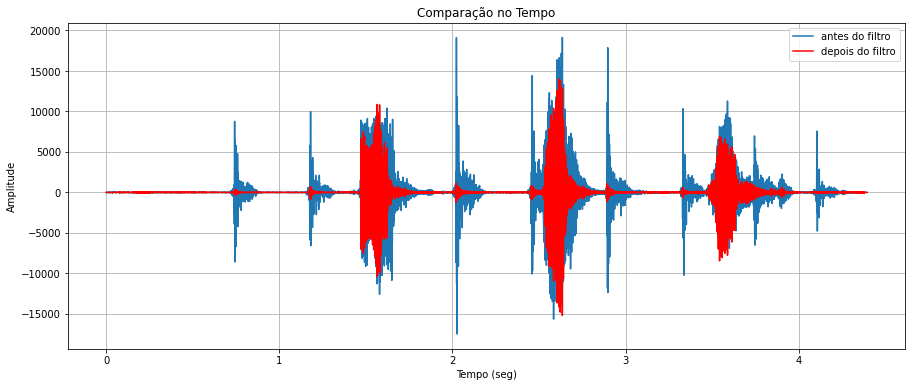

In [19]:
plt.figure(figsize = (15, 6))
plt.title("Comparação no Tempo")
plt.xlabel("Tempo (seg)")
plt.ylabel("Amplitude")
plt.plot(tempo, sinal, label='antes do filtro')
plt.plot(tempo, y, label='depois do filtro', color='r')
plt.legend()
plt.grid()
plt.show()

Após a passagem do filtro é possível observar que houve um decaimento nas frequências de maior valor, que eram justamente onde o ruído se encontrava. Contudo, por se tratar de um sinal real e esse não ser um filtro perfeito, ainda restaram alguns ruídos no áudio final.

## Gravação do áudio filtrado

---



In [20]:
y_filter = np.int16(y * (32767 / y.max()))

wavfile.write("audio_limpo.wav", fs, y_filter)

In [21]:
IPython.display.Audio('/content/audio_limpo.wav')

In [22]:
IPython.display.Audio(arqWav)

## Referências

---

KALNOSKAS, Aimee. **Basics of audio filters**. Analog IC Tips, 2021. Disponível em: [link](https://www.analogictips.com/basics-of-audio-filters/). Acesso em: 21/06/2022.

HIGUTI, Ricardo T. **Sinais e Sistemas de Tempo Discreto**. Departamento de Engenharia Elétrica - FEIS - Unesp. Disponível em: [link](https://www.feis.unesp.br/Home/departamentos/engenhariaeletrica/ele1095_2_sinaissistemas.pdf). Acesso em: 21/06/2022.

KEIM, Robert. **Anti-Aliasing Filters: Applying Sampling Theory to ADC Design**. All About Circuits, 2020. Disponível em: [link](https://www.allaboutcircuits.com/technical-articles/anti-aliasing-filters-applying-sampling-theory-to-adc-design/). Acesso em: 20/06/2022.

LAI, Edmund. **Practical digital signal processing**. Elsevier, 2003.

O'HAVER, Tom. **A Pragmatic* Introduction to Signal Processing**. Department of Chemistry and Biochemistry - The University of Maryland at College Park, 2022. Disponível em: [link](https://terpconnect.umd.edu/~toh/spectrum/). Acesso em: 26/06/2022.

OPPENHEIM, Alan V.; SCHAFER, Ronald W. **Processamento em tempo discreto de sinais**. 3.ed. Pearson, 2013.

PANKAJRAWAT. **Experiment Audio - Solution [Noise Removal from Audio]**. YouTube, 2019. Disponível em: [link](https://youtu.be/c1WNdHXoeIw). Acesso em: 10/06/2022.

PYTHON AUDIO. **3. Reading a Wave File**. Audio Programming In Python, 2014. Disponível em: [link](http://pythonaudio.blogspot.com/2014/04/3-reading-wave-file.html). Acesso em 10/06/2022.

THE MATPLOTLIB DEVELOPMENT TEAM. **Matplotlib 3.5.2 documentation**. Matplotlib, 2022. Disponível em: [link](https://matplotlib.org/3.5.2/index.html). Acesso em: 11/06/2022.

THE SCIPY COMMUNITY. **SciPy documentation**. SciPy, 2022. Disponível em: [link](https://docs.scipy.org/doc/scipy/index.html). Acesso em: 11/06/2022.

---